<a href="https://colab.research.google.com/github/data-tamer2410/ds-developer-salary-analysis/blob/main/developer_salary_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data.

In [ ]:
df = pd.read_csv('2017_jun_final.csv')

The data is loaded from a CSV file that contains information on developers, including their salaries, job roles, experience, and more.



In [ ]:
df.head()

,N,Посада,Мова програмування,Спеціалізація,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,...,Ще студент,Рівень англійської,Предметна область,Дата заповнення,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харків,до 10 осіб,...,True,Pre-intermediate (нище середнього),"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,менше 3 місяців,менше 3 місяців,430,130,Харків,більше 1000 осіб,...,True,Upper-Intermediate (вище середнього),Веб-розробка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Київ,до 1000 осіб,...,False,Intermediate (середній),"Веб-розробка,Корпоративні системи",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одеса,до 200 осіб,...,False,Pre-intermediate (нище середнього),"Desktop Applications,Веб-розробка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 і більше років,0.5,4500,500,Інше,до 10 осіб,...,False,Intermediate (середній),"Desktop Applications,Веб-розробка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV


Data from June 2017 developer survey.

## Data Cleaning.

In [ ]:
df.set_index('N',inplace=True)
df.shape

(8704, 23)

In [ ]:
df.dtypes

,0
Посада,object
Мова програмування,object
Спеціалізація,object
Загальний досвід роботи,object
Досвід роботи на поточному місці,object
Зарплата на місяць,int64
Зміна зарплати за 12 місяців,int64
Місто,object
Розмір компанії,object
Тип компанії,object


In [ ]:
df.isnull().sum()

,0
Посада,0
Мова програмування,3850
Спеціалізація,7219
Загальний досвід роботи,0
Досвід роботи на поточному місці,0
Зарплата на місяць,0
Зміна зарплати за 12 місяців,0
Місто,0
Розмір компанії,0
Тип компанії,0


In [ ]:
df['Дата заповнення'] = pd.to_datetime(df['Дата заповнення'],dayfirst=True)

In [ ]:
lang = df['Мова програмування']
df.dropna(axis=1,how='any',inplace=True)
df[lang.name] = lang

In [ ]:
df.isna().sum()

,0
Посада,0
Загальний досвід роботи,0
Досвід роботи на поточному місці,0
Зарплата на місяць,0
Зміна зарплати за 12 місяців,0
Місто,0
Розмір компанії,0
Тип компанії,0
Вік,0
Освіта,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(4854, 18)



*   Set the index to the column 'N'.
*   Convert the 'Дата заповнення' column to a datetime format.
*   Drop any columns with missing values and then restore the 'Мова програмування' column.
*   Drop any rows that still contain missing values.



## Filtering Python Developers.

In [ ]:
python_data = df[df['Мова програмування'] == 'Python'] #we will get all developers who program in Python
python_data.head()

,Посада,Загальний досвід роботи,Досвід роботи на поточному місці,Зарплата на місяць,Зміна зарплати за 12 місяців,Місто,Розмір компанії,Тип компанії,Вік,Освіта,Ще студент,Рівень англійської,Дата заповнення,User.Agent,exp,current_job_exp,salary,Мова програмування
N,,,,,,,,,,,,,,,,,,
13,Software Engineer,1,менше 3 місяців,800,200,Київ,до 50 осіб,Аутсорсингова,26,Вища,False,Pre-intermediate (нище середнього),2017-06-12 13:05:54,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1.0,0.0,800,Python
69,Software Engineer,1.5,0.5,900,900,Київ,до 10 осіб,Стартап,21,Неповна Вища,True,Upper-Intermediate (вище середнього),2017-06-12 13:11:17,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1.5,0.5,900,Python
88,Junior Software Engineer,0.5,0.5,600,0,Київ,до 10 осіб,Аутсорсингова,19,Неповна Вища,True,Upper-Intermediate (вище середнього),2017-06-12 13:12:25,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,0.5,0.5,600,Python
115,Junior Software Engineer,1.5,0.5,685,250,Київ,до 1000 осіб,Аутсорсингова,21,Неповна Вища,False,Intermediate (середній),2017-06-12 13:14:52,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.5,0.5,685,Python
144,Junior Software Engineer,1,1,750,250,Київ,до 10 осіб,Аутсорсингова,21,Неповна Вища,True,Upper-Intermediate (вище середнього),2017-06-12 13:19:10,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,1.0,750,Python


Filters out all the developers who use Python as their primary language.

## Aggregating Salary Data by Job Position.

In [ ]:
df2 = df.groupby('Посада')['Зарплата на місяць'].agg(['min','max']) #determine the minimum and maximum salary for each position
df2

,min,max
Посада,,
Data Scientist / Data Analyst,2700,2700
DevOps,7000,7000
ERP / CRM,2000,2000
HTML coder,385,600
Junior Software Engineer,75,2600
Product Manager,3000,3000
Senior Software Engineer,350,9200
Software Engineer,100,7000
System Architect,400,10000


In [ ]:
def fill_avg_salary(group):
    return group.mean()

avg = df.groupby('Посада')['Зарплата на місяць'].apply(fill_avg_salary)
df2['avg'] = avg.round(2)         #add the average salary for each position
df2

,min,max,avg
Посада,,,
Data Scientist / Data Analyst,2700,2700,2700.00
DevOps,7000,7000,7000.00
ERP / CRM,2000,2000,2000.00
HTML coder,385,600,457.00
Junior Software Engineer,75,2600,605.66
Product Manager,3000,3000,3000.00
Senior Software Engineer,350,9200,3243.20
Software Engineer,100,7000,1678.63
System Architect,400,10000,4387.08


It can be noted that the highest salary of all positions is Technical Lead, and the lowest is Junior Software Engineer.

The highest average of all positions is DevOps, but this cannot be said because there is only one developer with this position in the dataset.

In [ ]:
df2.describe().round(2) #let's define descriptive statistics

,min,max,avg
count,11.00,11.00,11.00
mean,1728.18,6009.09,2907.80
std,2082.87,5028.41,1828.36
min,75.00,600.00,457.00
25%,367.50,2650.00,1839.32
50%,500.00,4000.00,3000.00
75%,2600.00,8100.00,3457.14
max,7000.00,18000.00,7000.00


This part of the code groups the data by job position, calculating the minimum, maximum, and average salary for each role.


## Saving Analysis Results.

In [ ]:
df2.to_csv('analysis_data.csv',encoding='utf-8')

Saves the salary analysis results to a CSV file for future use.

## Visualizations.

In [ ]:
sns.set_style('darkgrid')



*   Impact of English Proficiency on Salary


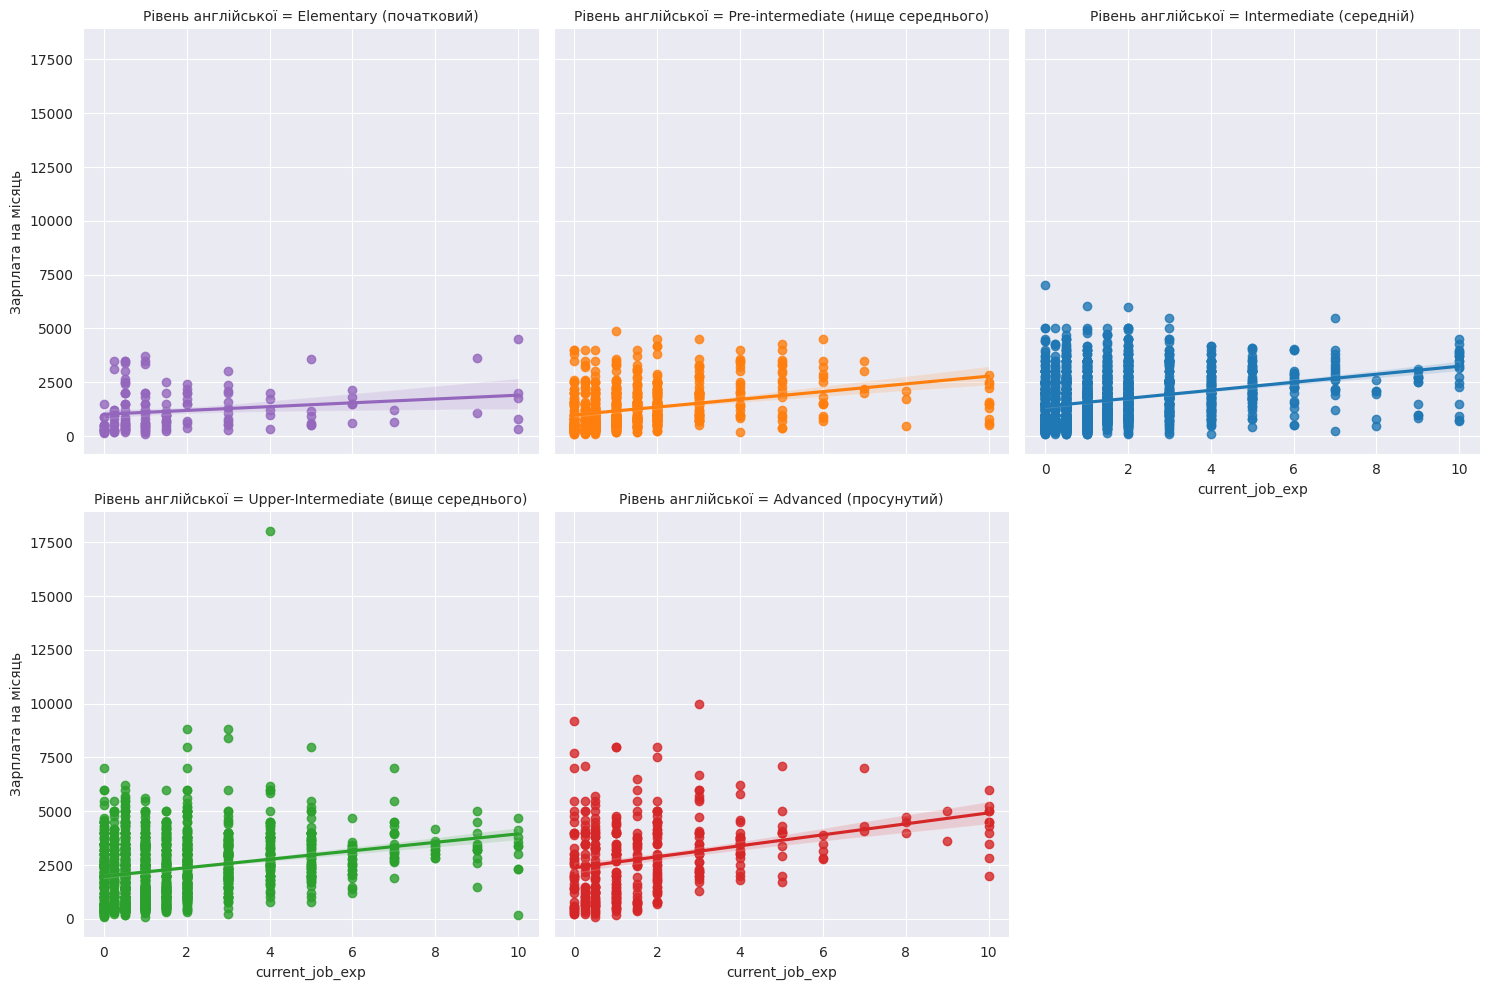

In [ ]:
sns.lmplot(
    x='current_job_exp',
    y='Зарплата на місяць',
    col='Рівень англійської',
    col_wrap=3,hue='Рівень англійської',
    col_order=[
        'Elementary (початковий)',
        'Pre-intermediate (нище середнього)',
        'Intermediate (середній)',
        'Upper-Intermediate (вище середнього)',
        'Advanced (просунутий)'
        ],
    data=df
    )

This plot shows the relationship between work experience and salary, separated by English proficiency levels.





*   Scatterplot: Salary vs Age by Job Role



<Axes: xlabel='Посада', ylabel='Зарплата на місяць'>

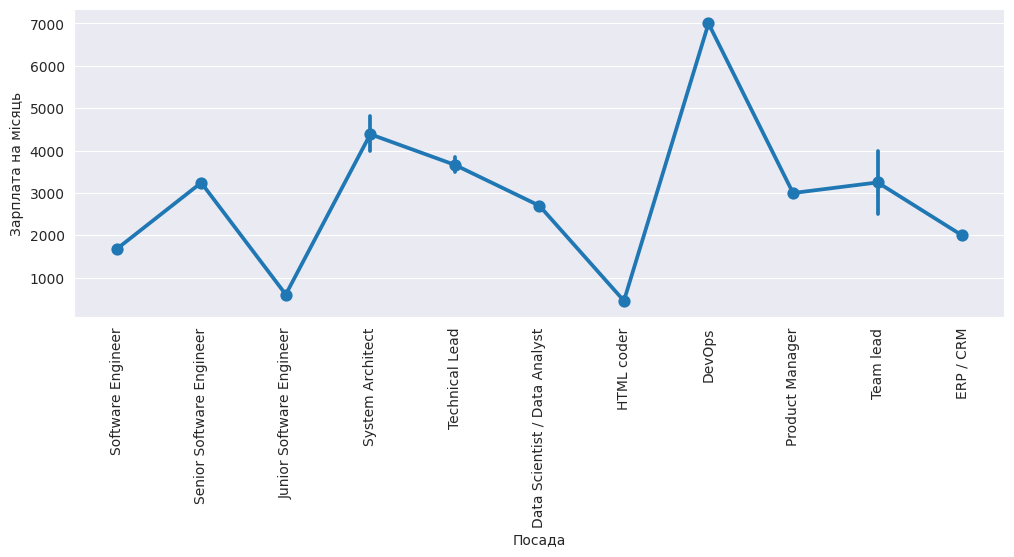

In [ ]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=90)
sns.pointplot(x='Посада',y='Зарплата на місяць',data=df)

Multiple scatterplots show the distribution of salary against age for each job position.

*   Boxenplot: Company Size vs Salary Changes

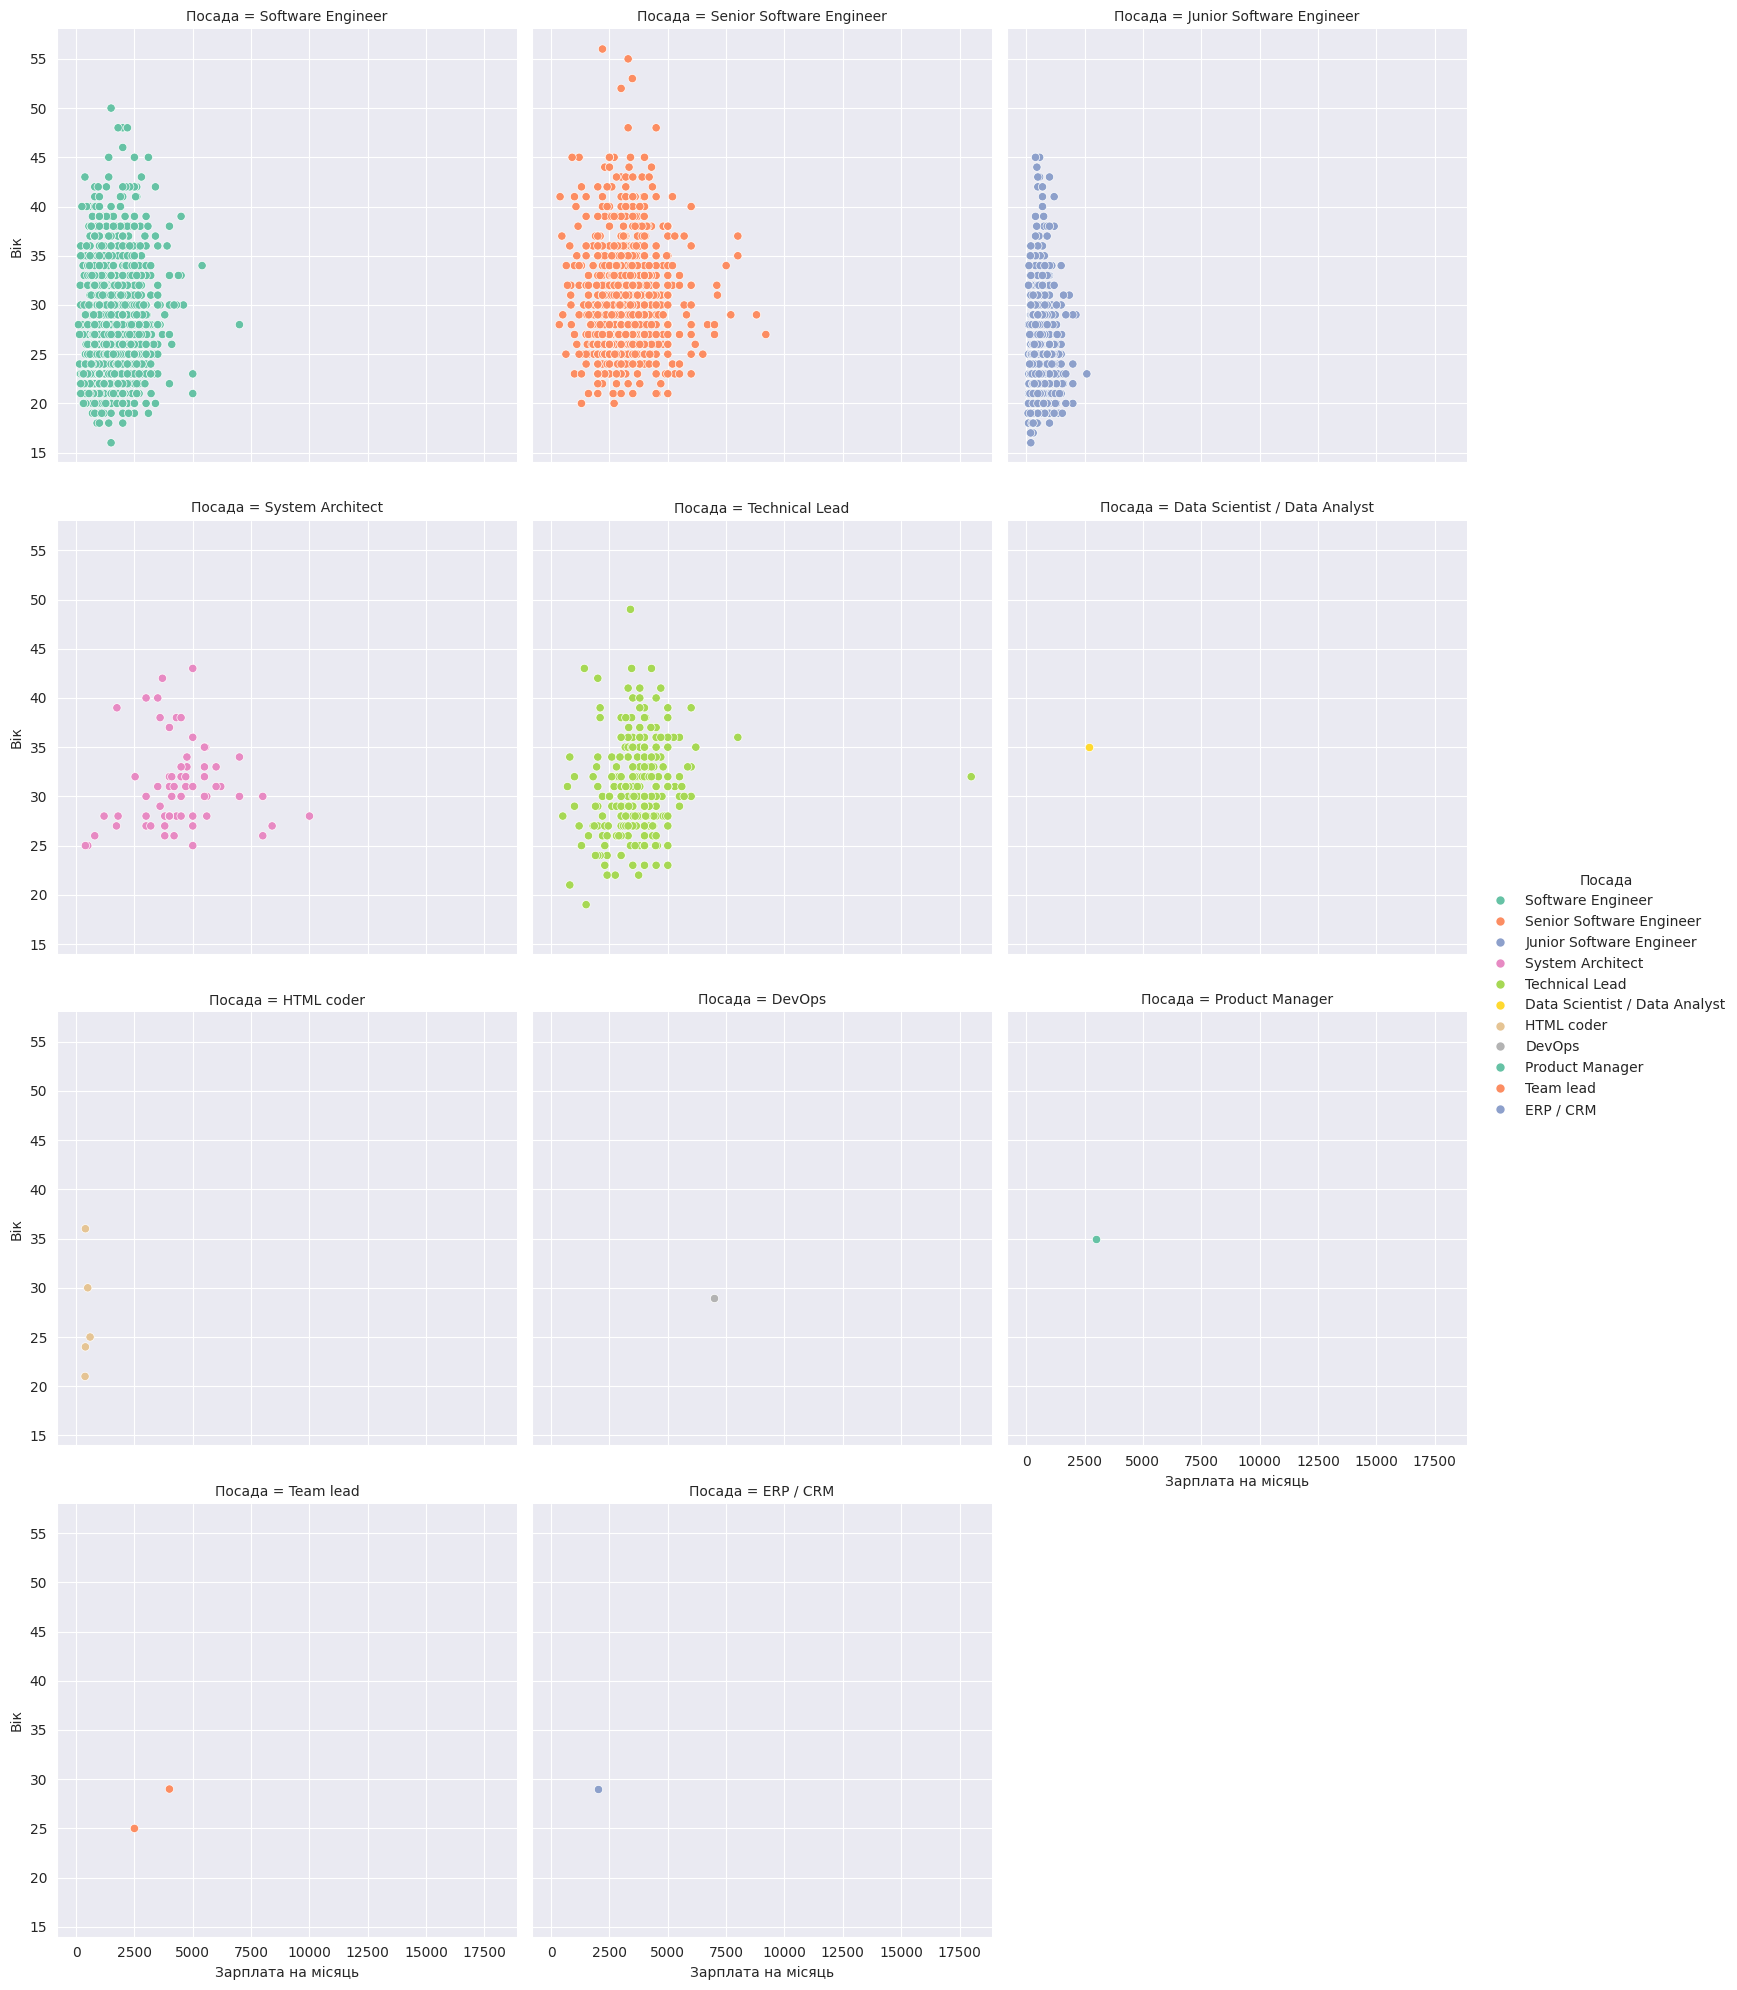

In [ ]:
sns.relplot(
    x='Зарплата на місяць',
    y='Вік',hue='Посада',
    col='Посада',col_wrap=3,
    kind='scatter',
    data=df,
    palette='Set2'
    )

This graph highlights the effect of company size on salary changes over the last 12 months.

In [ ]:
df['Розмір компанії'].unique()

array(['до 1000 осіб', 'до 200 осіб', 'до 10 осіб', 'до 50 осіб',
       'більше 1000 осіб'], dtype=object)

*   Barplot: Salary vs Experience and Education

<Axes: xlabel='Розмір компанії', ylabel='Зміна зарплати за 12 місяців'>

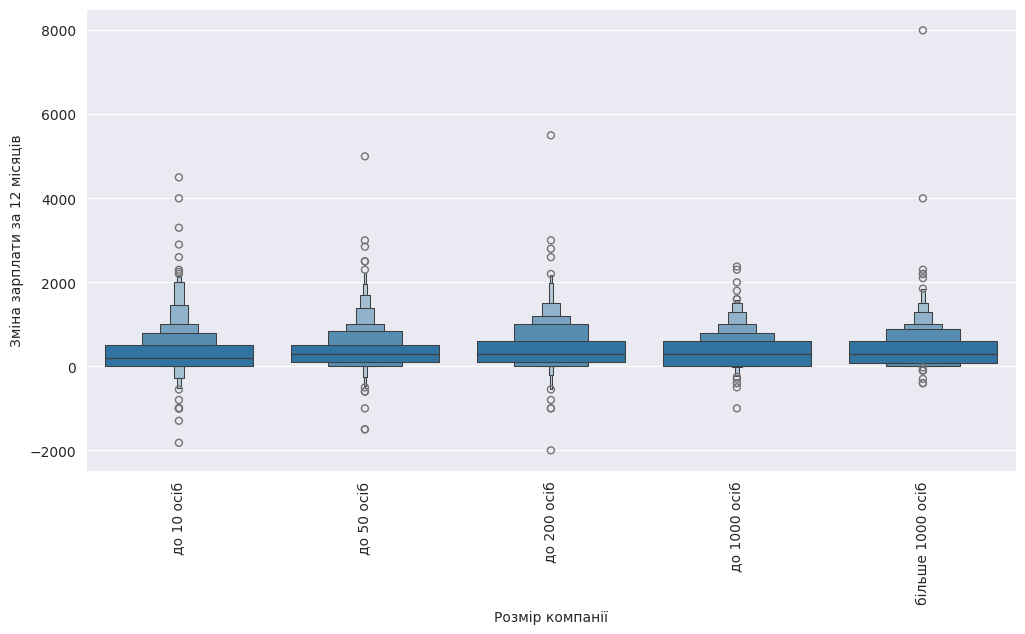

In [ ]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
sns.boxenplot(
    x='Розмір компанії',
    y='Зміна зарплати за 12 місяців',
    order=[
        'до 10 осіб',
        'до 50 осіб',
        'до 200 осіб',
        'до 1000 осіб',
        'більше 1000 осіб'
    ],
    data=df
    )

This barplot visualizes the relationship between overall work experience, education level, and salary.

*   Countplot: Age Distribution of Developers

<Axes: xlabel='Вік', ylabel='count'>

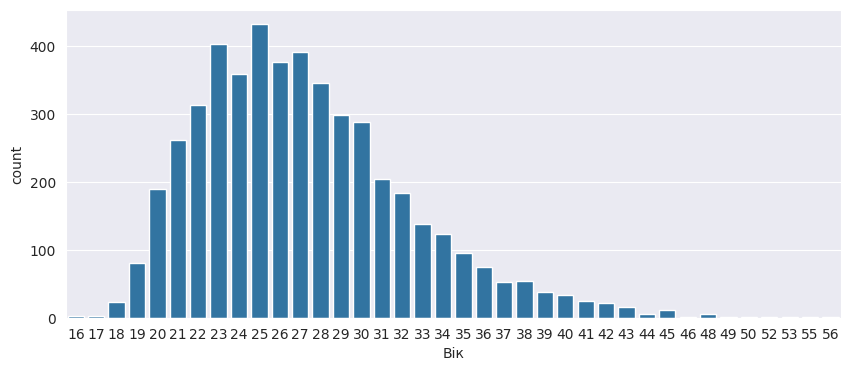

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='Вік',data=df)

This countplot visualizes the distribution of developers' ages. The x-axis shows age, and the y-axis shows the count of developers for each age group.

*   Barplot: Salary by Overall Work Experience and Education

<Axes: xlabel='Загальний досвід роботи', ylabel='Зарплата на місяць'>

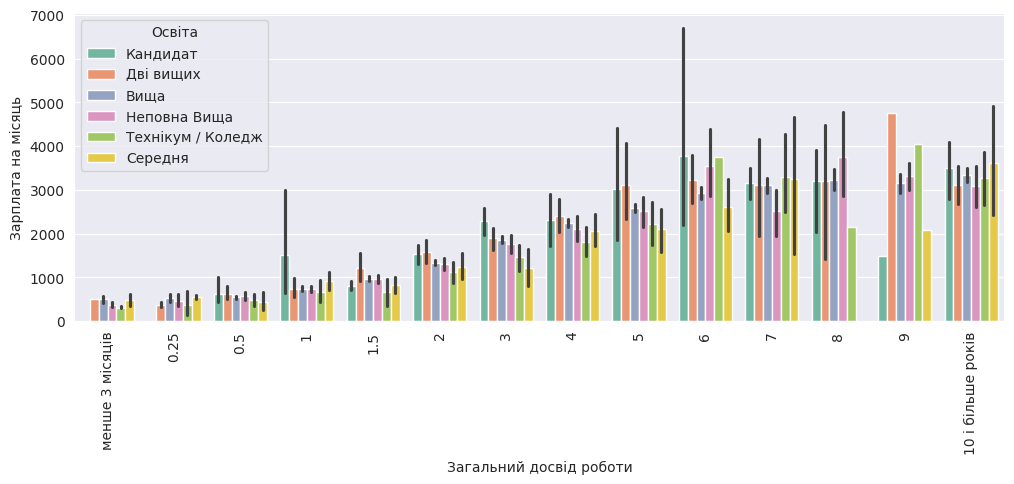

In [ ]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=90)
sns.barplot(
    y='Зарплата на місяць',
    hue='Освіта',
    x='Загальний досвід роботи',
    order=[
        'менше 3 місяців',
        0.25,0.5,1,1.5,2,3,4,5,6,7,8,9,
        '10 і більше років'
        ],
    hue_order=[
        'Кандидат',
        'Дві вищих',
        'Вища',
        'Неповна Вища',
        'Технікум / Коледж',
        'Середня',
        ],
    palette='Set2',
    data=df
    )

This bar plot demonstrates the relationship between overall work experience (x-axis) and monthly salary (y-axis), with bars colored based on education level.

## Conclusion.

The analysis of developer salaries based on various factors reveals several key insights:

1.   **Work Experience and English Proficiency**: Developers with higher levels of English proficiency and more work experience tend to earn higher salaries. This correlation highlights the importance of both language skills and experience in determining salary.

2.   **Job Title**: Salary varies significantly by job title, with technical and senior roles like System Architect and Technical Lead commanding the highest salaries. However, some results, such as for DevOps, need careful interpretation due to the small number of observations.

3.  **Age and Salary**: The scatterplots reveal that salary generally increases with age across different job titles, but there are notable variations based on position.

4.  **Company Size**: The size of the company influences salary changes, with larger companies typically offering more salary growth opportunities over time, although smaller companies can still provide competitive salary adjustments.

5.  **Developer Age Distribution**: The age distribution shows that most developers in the dataset are between 23-27 years old, indicating that the developer workforce is relatively young.

6.  Work Experience and Education: While overall work experience positively impacts salary, education level does not appear to have a significant effect on salary. This suggests that practical experience may be more valued than formal education in the software development field.

